In [1]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import lognorm

In [2]:
def sorted_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)] 
    return sorted(l, key = alphanum_key)

def str_to_nparray(string):
    if not isinstance(string, str):
        return None
    from ast import literal_eval
    try:
        s = string.replace('\n', '').strip()
        s = s.replace('     ', ' ')
        s = s.replace('    ', ' ')
        s = s.replace('   ', ' ')
        s = s.replace('  ', ' ')
        s = s.replace('  ', ' ')
        s = s[:1] + s[2:]
        s = s.replace(' ', ',')
        lst = literal_eval(s)
    except:
        import code; code.interact(local=locals())
    return np.array(lst)


In [3]:
fix_path = './data/fixations_feat_OU_and_ROI/'
sac_path = './data/saccades_feat_OU_and_ROI/'
sbj_path = './data/subject_features.csv'

fix_features_list = sorted_nicely(os.listdir(fix_path))
sac_features_list = sorted_nicely(os.listdir(sac_path))
sbj_features = pd.read_csv(sbj_path)
sbj_features = sbj_features.drop(sbj_features.columns[:2], axis=1)
first_12_sbj_features = sbj_features[:12]

Example of pupil dilatation

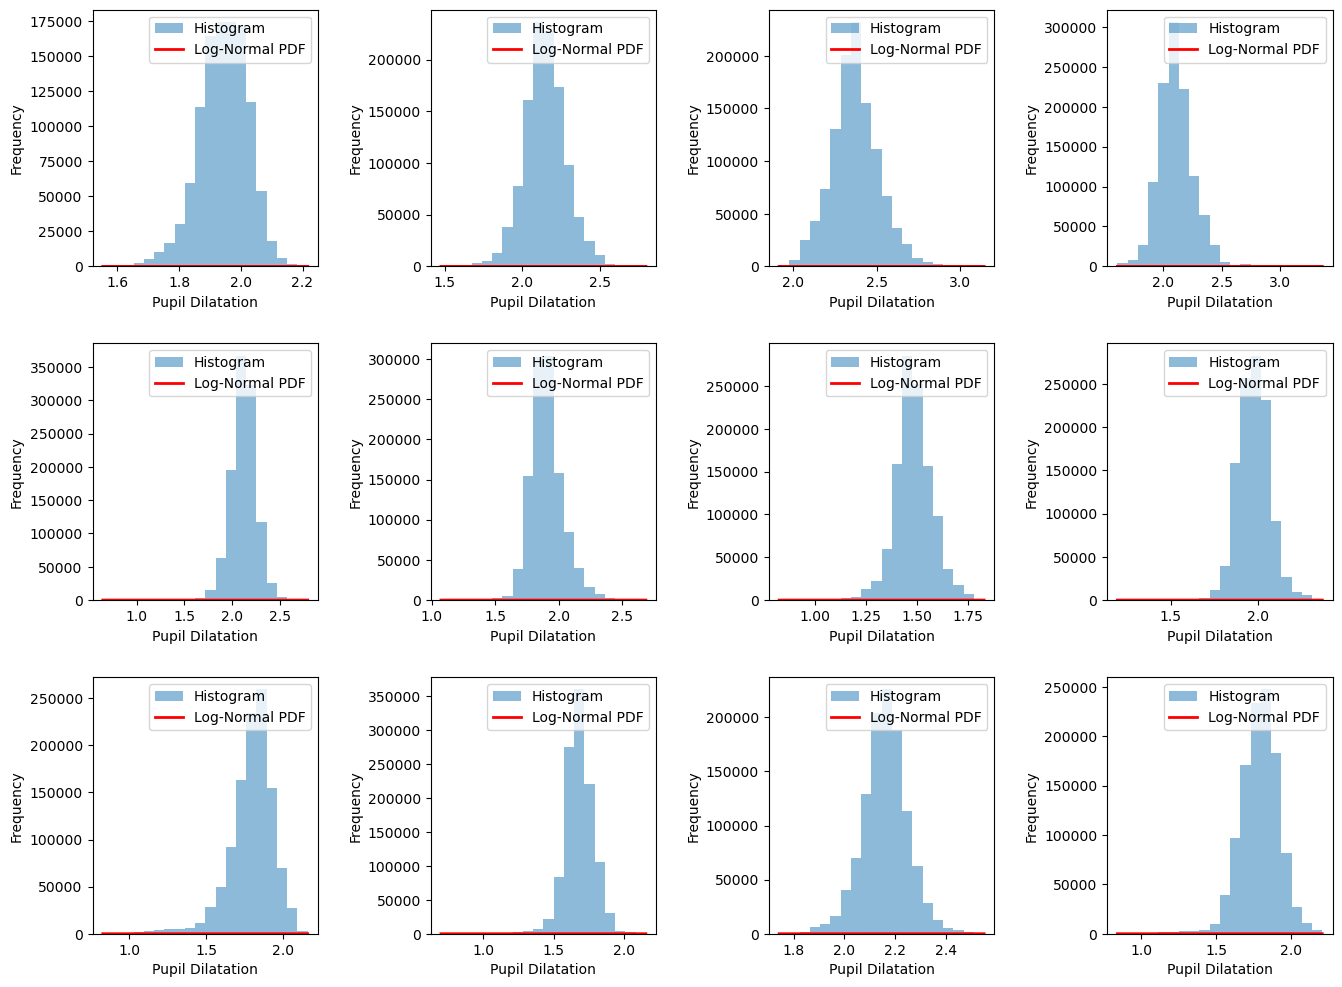

In [15]:
data_path = './data/pupil_data/'
pupil_dilation_paths = sorted_nicely(os.listdir(data_path))

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
lognorm_features = first_12_sbj_features.iloc[:, -3:]

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

for i, name in enumerate(pupil_dilation_paths[:12]):
    pupil_dilation = pd.read_csv(os.path.join(data_path, name))
    pupil_list = pupil_dilation.values.flatten().tolist()

    features = lognorm_features.iloc[i]

    # Generate values for x
    x = np.linspace(min(pupil_list), max(pupil_list), 100)
    # Calculate the PDF using the lognorm.pdf function
    pdf_values = lognorm.pdf(x, features[0], loc=features[1], scale=features[2])

    ax = axes[i]
    ax.hist(pupil_list, bins=20, alpha=0.5, label='Histogram')  # Histogram plot
    ax.plot(x, pdf_values, 'r', linewidth=2, label='Log-Normal PDF')  # PDF plot

    ax.set_xlabel('Pupil Dilatation')
    ax.set_ylabel('Frequency')
    ax.legend()  # Add a legend for better understanding

plt.show()

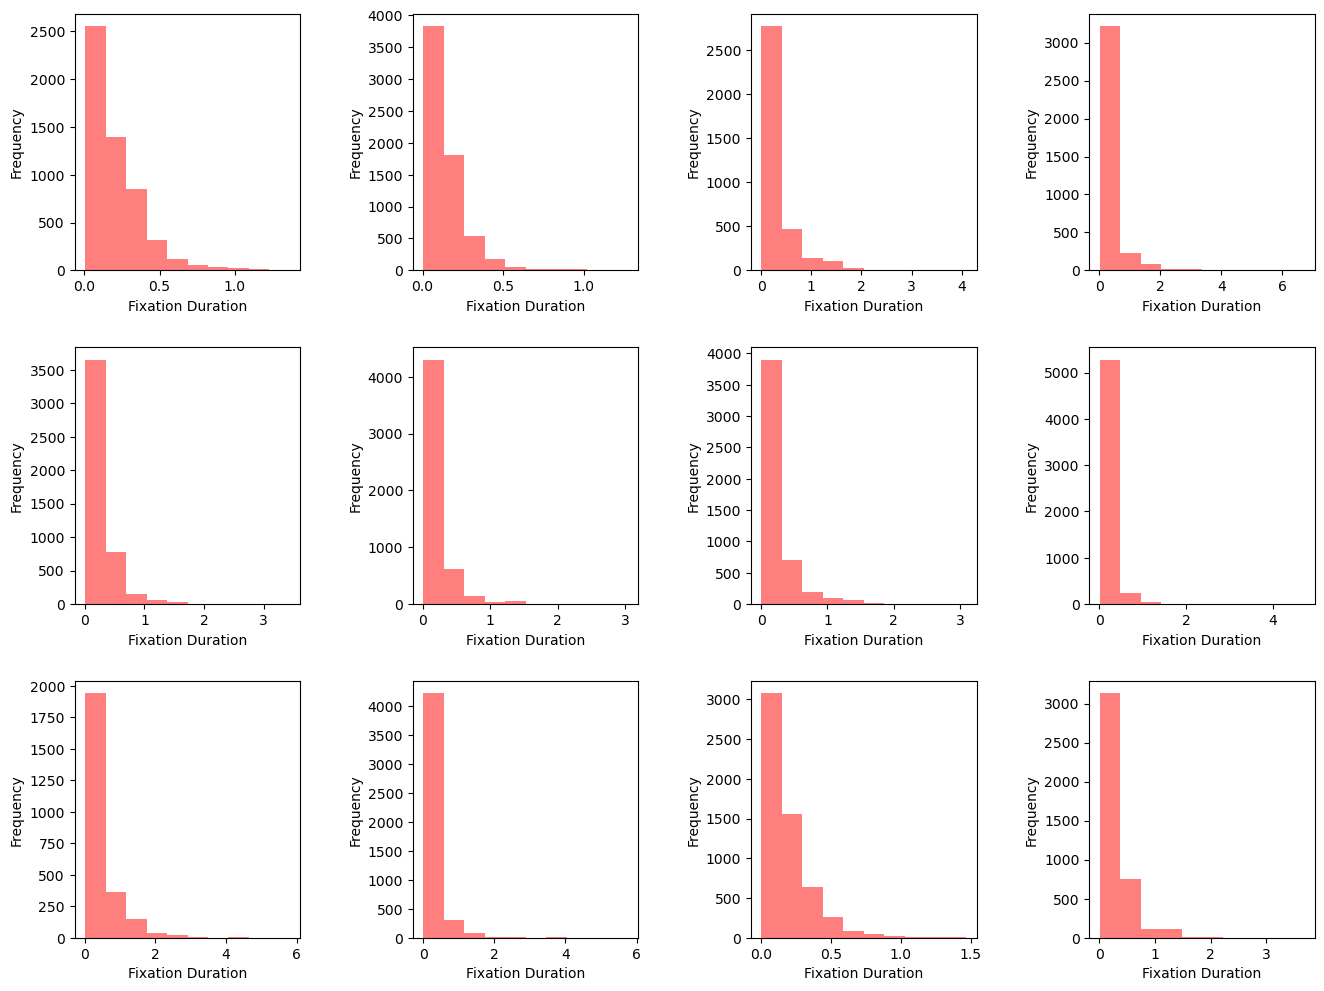

In [18]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

for i, s in enumerate(fix_features_list[:12]):
    s_fix = pd.read_csv(fix_path+s)
    s_fix['feature'] = s_fix['feature'].apply(str_to_nparray)
    
    ax = axes[i]
    duration_list = [s_fix['feature'][i][-1] for i in range(len(s_fix)) if s_fix['feature'][i] is not None]
    ax.hist(duration_list, color='red', alpha=0.5)
    ax.set_xlabel('Fixation Duration')
    ax.set_ylabel('Frequency')
    
plt.show()

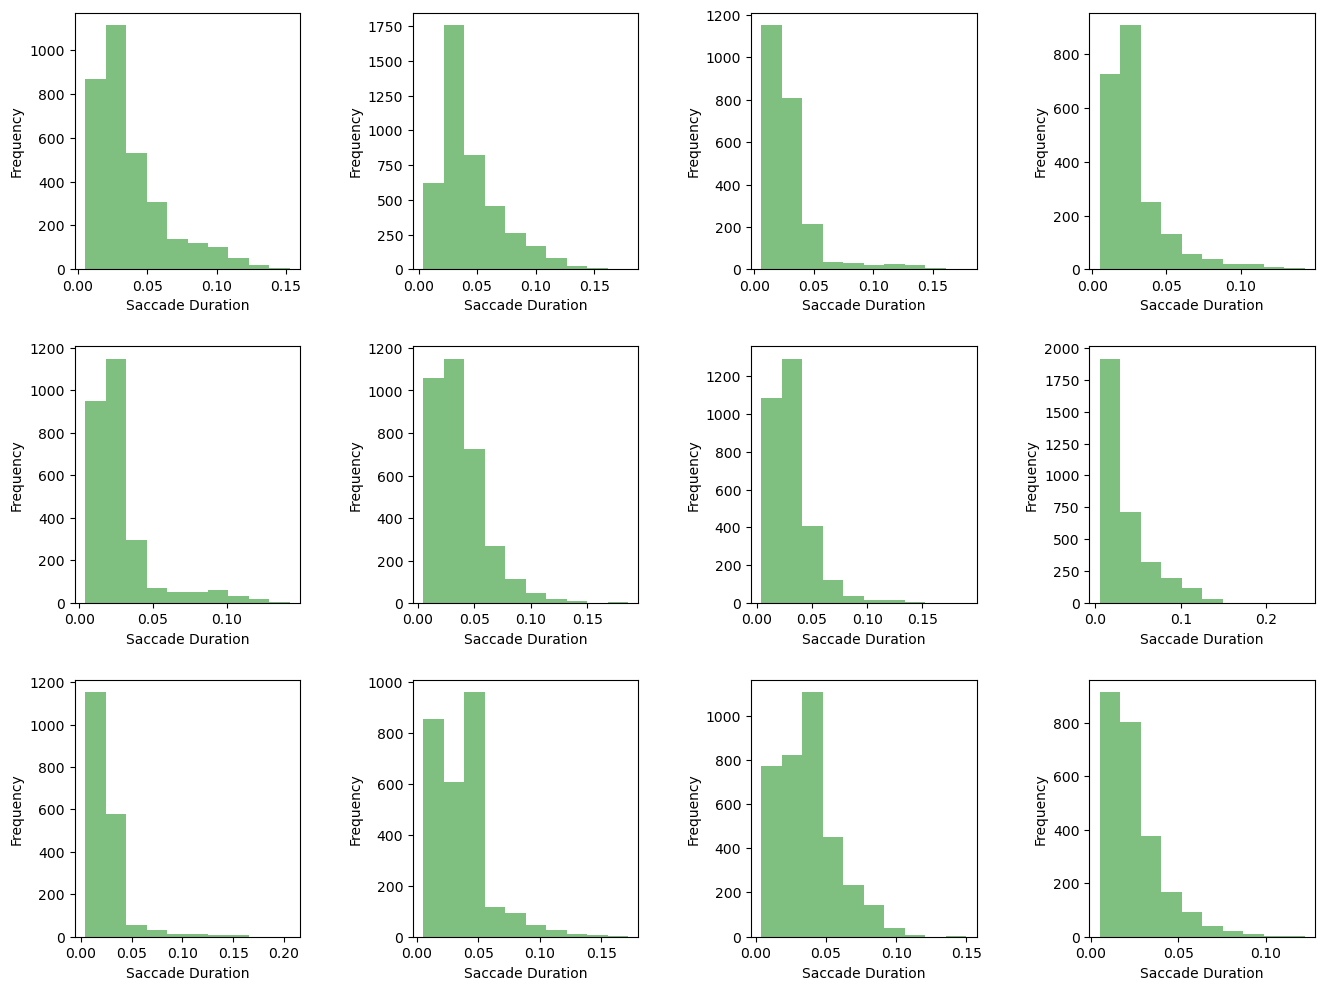

In [21]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

for i, s in enumerate(sac_features_list[:12]):
    s_sac = pd.read_csv(sac_path+s)
    s_sac['feature'] = s_sac['feature'].apply(str_to_nparray)
    
    ax = axes[i]
    duration_list = [s_sac['feature'][i][-1] for i in range(len(s_sac)) if s_sac['feature'][i] is not None]
    ax.hist(duration_list, color='green', alpha=0.5)
    ax.set_xlabel('Saccade Duration')
    ax.set_ylabel('Frequency')
    
plt.show()

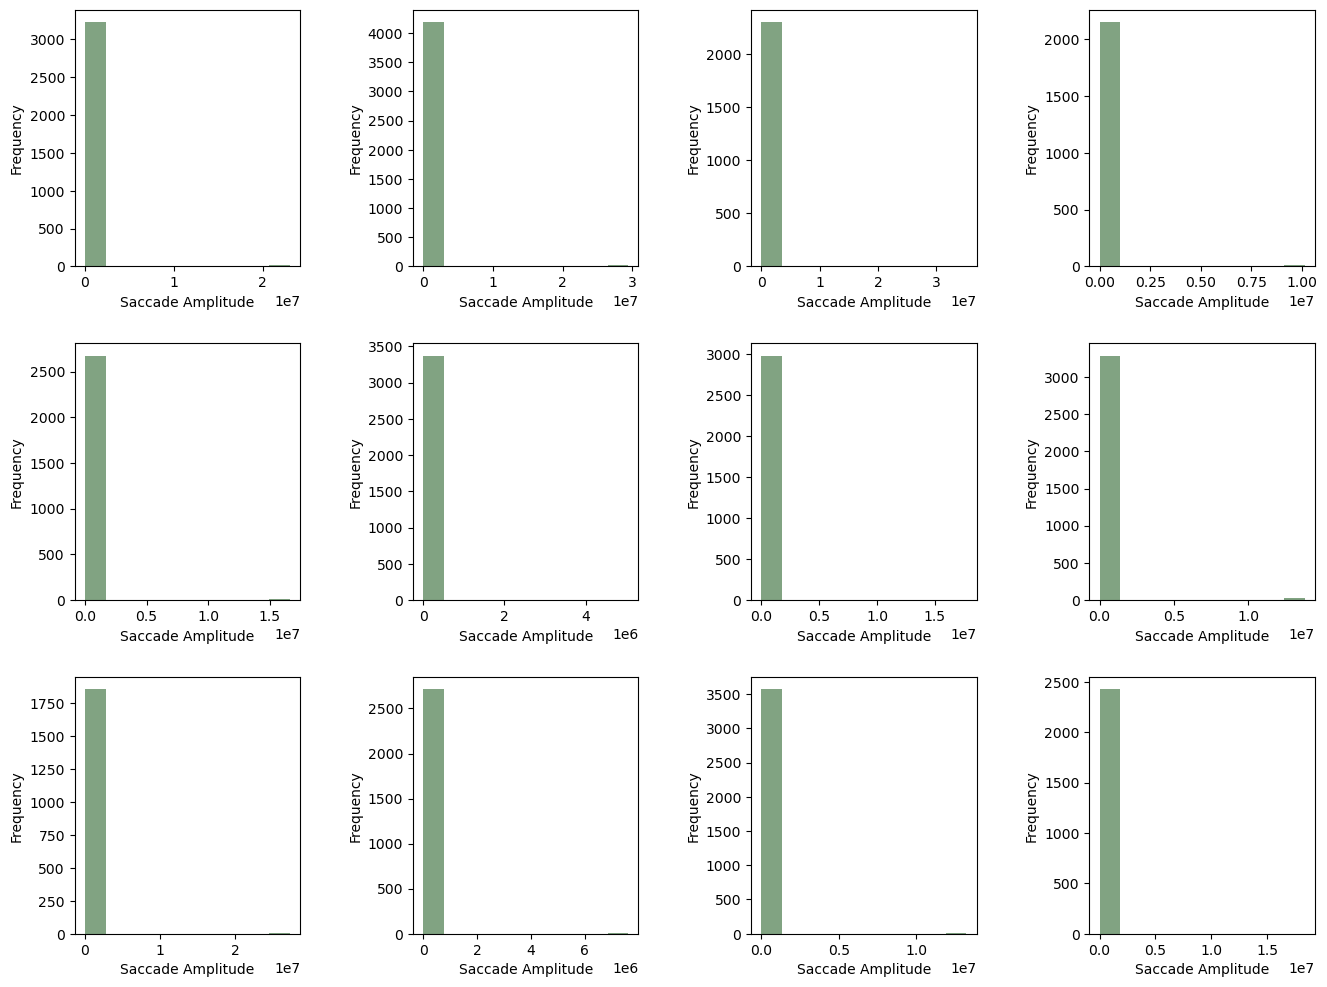

In [42]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

for i, s in enumerate(sac_features_list[:12]):
    s_sac = pd.read_csv(sac_path+s)
    s_sac['feature'] = s_sac['feature'].apply(str_to_nparray)
    
    ax = axes[i]
    duration_list = [s_sac['feature'][i][-2] for i in range(len(s_sac)) if s_sac['feature'][i] is not None]
    ax.hist(duration_list, color='xkcd:darkgreen', alpha=0.5)
    ax.set_xlabel('Saccade Amplitude')
    ax.set_ylabel('Frequency')
    
plt.show()

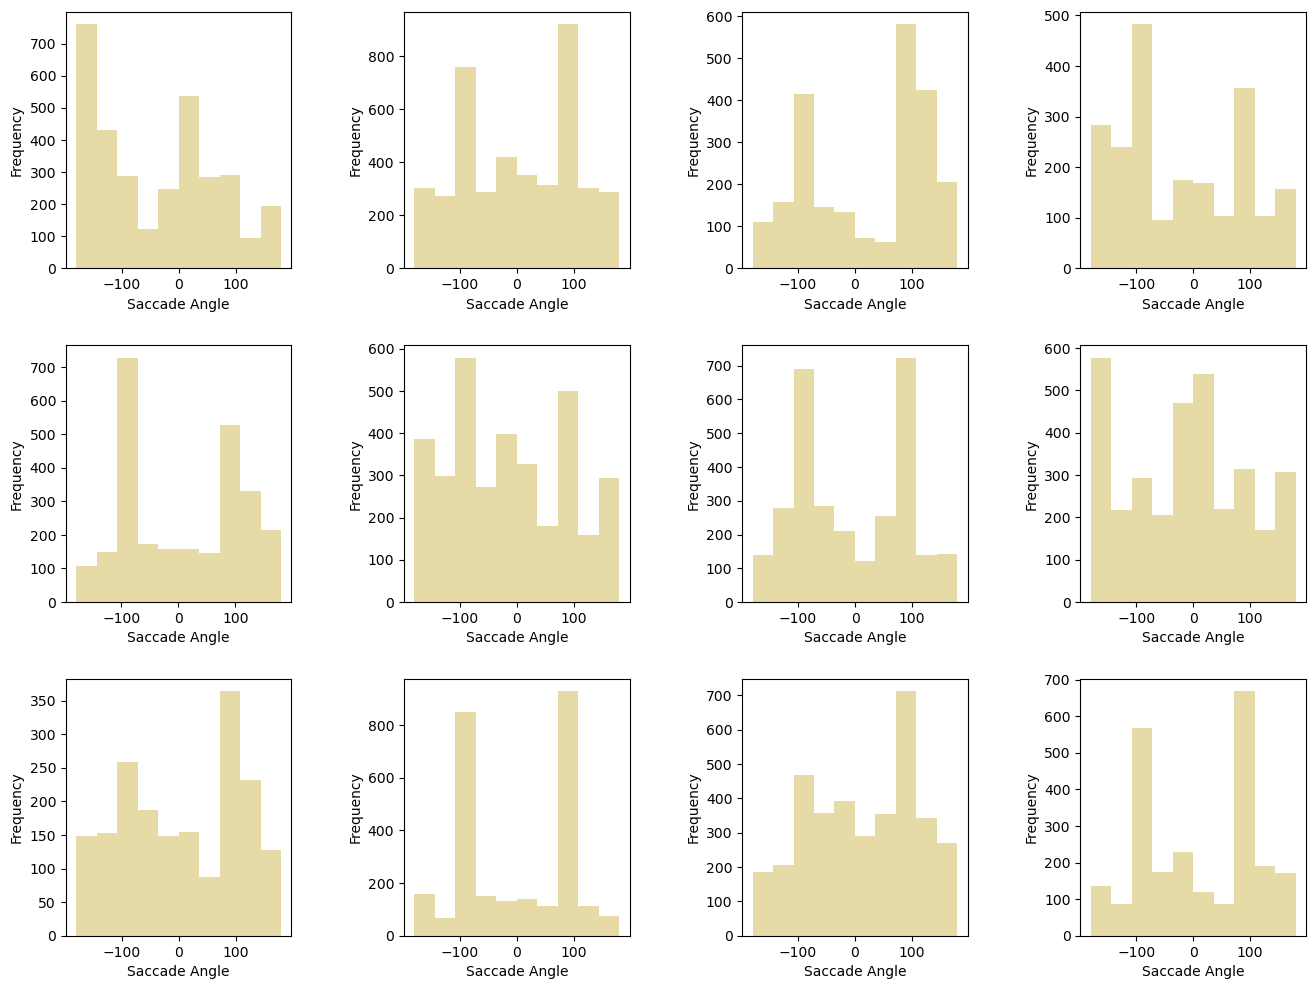

In [41]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Flatten the axes array to make it easier to iterate
axes = axes.ravel()

for i, s in enumerate(sac_features_list[:12]):
    s_sac = pd.read_csv(sac_path+s)
    s_sac['feature'] = s_sac['feature'].apply(str_to_nparray)
    
    ax = axes[i]
    duration_list = [s_sac['feature'][i][-3] for i in range(len(s_sac)) if s_sac['feature'][i] is not None]
    ax.hist(duration_list, color='xkcd:beige')
    ax.set_xlabel('Saccade Angle')
    ax.set_ylabel('Frequency')
    
plt.show()